q4


q5

In [1]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic = pd.read_csv('../input/titanic/Titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [4]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic['age_group'] = pd.cut(titanic.Age, range(0, 81, 10), right=False, labels=age_labels)

In [5]:
# Count of Survivors by Gender
table = pd.crosstab(titanic['Survived'],titanic['Sex'])
print (table)

Sex       female  male
Survived              
0             16    86
1             40    14


In [6]:
# Proportion of survivors by Gender
print (titanic.groupby('Sex').Survived.mean())

Sex
female    0.714286
male      0.140000
Name: Survived, dtype: float64


In [7]:
table = pd.crosstab([titanic['Survived']], titanic['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]

results

[['Item', 'Value'],
 ['Chi-Square Test', 49.802198879551824],
 ['P-Value', 1.700532765120193e-12]]

In [8]:

print (titanic.groupby(['age_group']).Survived.mean())

age_group
0-9      0.363636
10-19    0.363636
20-29    0.340426
30-39    0.434783
40-49    0.090909
50-59    0.250000
60-69    0.000000
70-79    0.000000
Name: Survived, dtype: float64


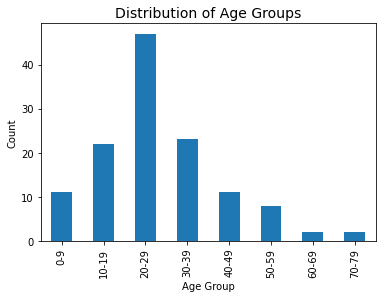

In [9]:
titanic.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

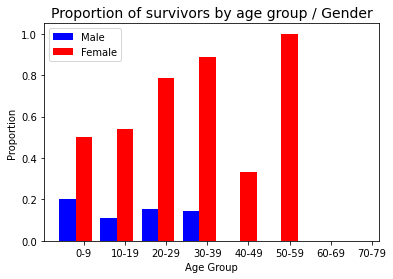

In [10]:
male_data = titanic[titanic.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = titanic[titanic.Sex == "female"].groupby('age_group').Survived.mean().values
tick_spacing = np.array(range(len(age_labels)))+0.4
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()